In [1]:
import numpy as np
import pandas as pd
import zipfile
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
f = zipfile.ZipFile('./aisles.csv.zip')
aisle_df = pd.read_csv(f.open('aisles.csv'))


In [3]:
aisle_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
aisle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
f2 = zipfile.ZipFile('./departments.csv.zip')
department_df = pd.read_csv(f2.open('departments.csv'))

In [6]:
department_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
department_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [8]:
f3 = zipfile.ZipFile('./order_products__prior.csv.zip')
order_product_prior = pd.read_csv(f3.open('order_products__prior.csv'))

In [9]:
order_product_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
order_product_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [11]:
f4 = zipfile.ZipFile('./order_products__train.csv.zip')
order_product_train = pd.read_csv(f4.open('order_products__train.csv'))

In [12]:
order_product_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [13]:
order_product_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [14]:
f5 = zipfile.ZipFile('./orders.csv.zip')
orders = pd.read_csv(f5.open('orders.csv'))

In [15]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [16]:
f6 = zipfile.ZipFile('./products.csv.zip')
products = pd.read_csv(f6.open('products.csv'))

In [17]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [18]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [19]:
ordered_products = pd.merge(orders,order_product_prior,on=['order_id'],how='inner')
ordered_products.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [20]:
ordered_products = ordered_products.merge(products,on=['product_id'],how='left')

In [21]:
ordered_products.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17


In [22]:
most_selling_product = ordered_products.groupby(['product_name']).agg(total_purchase=('order_id','count')).reset_index()

In [23]:
most_selling_product.sort_values(by=['total_purchase'],ascending=False,inplace=True)
most_selling_product.head()


,product_name,total_purchase
3676,Banana,472565
3471,Bag of Organic Bananas,379450
31920,Organic Strawberries,264683
28840,Organic Baby Spinach,241921
30297,Organic Hass Avocado,213584


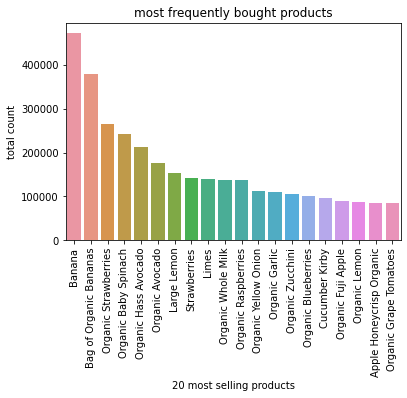

In [24]:
x = most_selling_product['product_name']
y = most_selling_product['total_purchase']

#most_selling_product.iloc[:20].plot.bar(x='product_name',y='total_purchase')

sns.barplot(x='product_name',y='total_purchase',data=most_selling_product.iloc[:20])
plt.xticks(rotation=90)
plt.xlabel('20 most selling products')
plt.ylabel('total count')
plt.title('most frequently bought products')
plt.show()

As we can see the most ordered product is Banana followed by bag of organic bananas & organic strawberries

In [25]:
ordered_products['department_id'].unique()

array([ 7, 16, 19, 17,  4, 14, 13, 20,  1, 11, 12,  6,  3, 15,  9,  5,  8,
       18,  2, 21, 10])

In [29]:
total_orders = len(ordered_products['reordered'])

In [34]:
reorder_ratio = ordered_products['reordered'].value_counts()/total_orders
print(reorder_ratio.index, ":", reorder_ratio.values)

Int64Index([1, 0], dtype='int64') : [0.58969747 0.41030253]


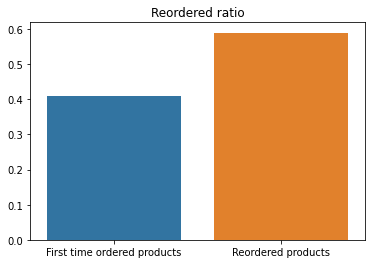

In [38]:
ax = sns.barplot(x=reorder_ratio.index, y=reorder_ratio.values)
plt.title('Reordered ratio')
ax.set_xticklabels(['First time ordered products','Reordered products'])
plt.show()

Position of product in basket with reordered ratio

In [41]:
position_of_product = ordered_products.groupby(['add_to_cart_order']).agg(reorder=('reordered','mean')).reset_index()
position_of_product.head(10)

,add_to_cart_order,reorder
0,1,0.677533
1,2,0.676251
2,3,0.658037
3,4,0.636958
4,5,0.617383
5,6,0.600420
6,7,0.585687
7,8,0.573247
8,9,0.561474
9,10,0.551018


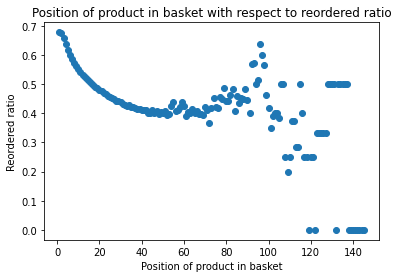

In [42]:
plt.scatter(x=position_of_product['add_to_cart_order'],y=position_of_product['reorder'],cmap='g')
plt.xlabel('Position of product in basket')
plt.ylabel('Reordered ratio')
plt.title('Position of product in basket with respect to reordered ratio')
plt.show()

Number of products with respect to orders

In [43]:
number_of_products = ordered_products.groupby(['order_id']).agg(product_count=('product_id','count')).reset_index()
number_of_products.head()

,order_id,product_count
0,2,9
1,3,8
2,4,13
3,5,26
4,6,3


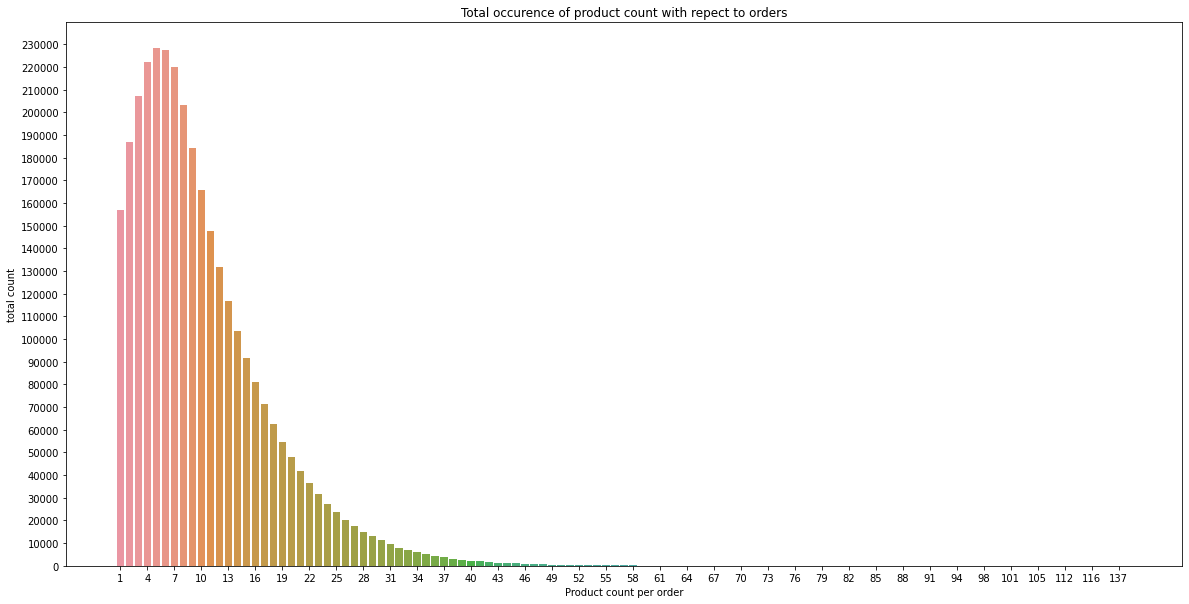

In [54]:
plt.figure(figsize=(20,10))
sns.countplot(x=number_of_products['product_count'],data=number_of_products)

plt.xticks(rotation=0)
plt.xlabel('Product count per order')
plt.ylabel('total count')
plt.title('Total occurence of product count with repect to orders')
plt.locator_params(nbins=40)
plt.show()

Effect on orders with respect to day of week

In [57]:
ordered_products['order_id'].nunique()

3214874

In [59]:
day_of_week = ordered_products.groupby(['order_dow']).agg(number_of_orders=('order_id','nunique')).reset_index()
day_of_week.head(7)

,order_dow,number_of_orders
0,0,557772
1,1,556705
2,2,441955
3,3,412400
4,4,401212
5,5,425982
6,6,418848


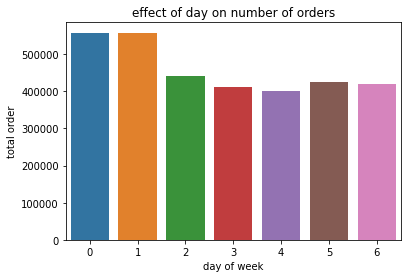

In [70]:
sns.barplot(x='order_dow',y='number_of_orders',data=day_of_week)
plt.xlabel('day of week')
plt.ylabel('total order')
plt.title('effect of day on number of orders')
plt.show()

In [76]:
order_hour = ordered_products.groupby(['order_hour_of_day']).agg(number_of_orders = ('order_id','nunique')).reset_index()
order_hour.head()

,order_hour_of_day,number_of_orders
0,0,21372
1,1,11596
2,2,7070
3,3,5120
4,4,5175


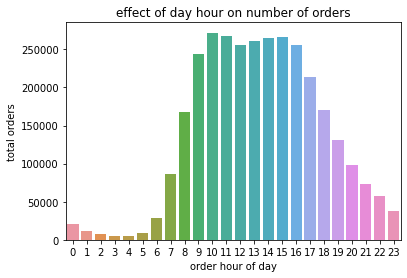

In [77]:
sns.barplot(x='order_hour_of_day',y='number_of_orders',data=order_hour)
plt.xlabel('order hour of day')
plt.ylabel('total orders')
plt.title('effect of day hour on number of orders')
plt.show()

In [85]:
first_order_product = ordered_products[ordered_products['add_to_cart_order']==1]
first_order_product.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,prior,1,NaN,8,NaN,196,1,0,Soda,77,7
5,2398795,1,prior,2,NaN,7,15.0,196,1,1,Soda,77,7
11,473747,1,prior,3,NaN,12,21.0,196,1,1,Soda,77,7
16,2254736,1,prior,4,NaN,7,29.0,196,1,1,Soda,77,7
21,431534,1,prior,5,NaN,15,28.0,196,1,1,Soda,77,7


In [88]:
freq_first_order_product = first_order_product.groupby(['product_name']).agg(first_ordered_count=('order_id','count')).reset_index()
freq_first_order_product.sort_values(by='first_ordered_count',ascending=False,inplace=True)

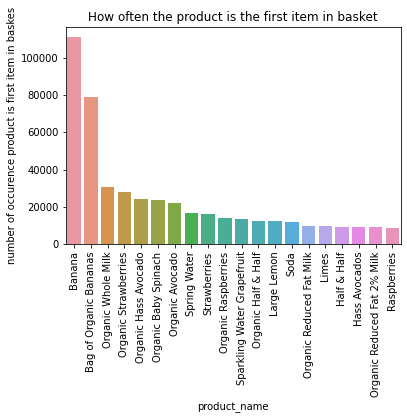

In [89]:
sns.barplot(x='product_name',y='first_ordered_count',data=freq_first_order_product.iloc[:20])
plt.xticks(rotation=90)
plt.xlabel('product_name')
plt.ylabel('number of occurence product is first item in baskes')
plt.title('How often the product is the first item in basket')
plt.show()

In [93]:
total_orders = ordered_products['order_id'].count()
print(total_orders)

32434489


In [95]:
ordered_products = ordered_products.merge(department_df,on=['department_id'],how='left')

In [96]:
ordered_products.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,2539329,1,prior,1,NaN,8,NaN,196,1,0,Soda,77,7,beverages
1,2539329,1,prior,1,NaN,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,dairy eggs
2,2539329,1,prior,1,NaN,8,NaN,12427,3,0,Original Beef Jerky,23,19,snacks
3,2539329,1,prior,1,NaN,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,snacks
4,2539329,1,prior,1,NaN,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,household


In [97]:
orders_per_department = ordered_products.groupby(['department']).agg(number_of_orders = ('department_id','count')).reset_index()
orders_per_department.head(10)

,department,number_of_orders
0,alcohol,153696
1,babies,423802
2,bakery,1176787
3,beverages,2690129
4,breakfast,709569
5,bulk,34573
6,canned goods,1068058
7,dairy eggs,5414016
8,deli,1051249
9,dry goods pasta,866627


In [100]:
orders_per_department['percent_of_orders'] = (orders_per_department['number_of_orders']/total_orders)
orders_per_department.head()

,department,number_of_orders,percent_of_orders
0,alcohol,153696,0.004739
1,babies,423802,0.013066
2,bakery,1176787,0.036282
3,beverages,2690129,0.082940
4,breakfast,709569,0.021877


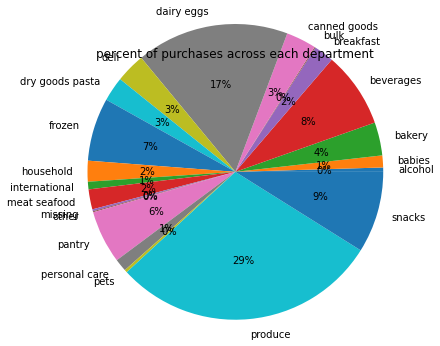

In [101]:
plt.pie(orders_per_department['number_of_orders'],labels=orders_per_department['department'],autopct='%.0f%%', radius=1.7)
plt.title("percent of purchases across each department")
plt.show()